In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\HARSHVARDHAN\Desktop\IPL 2025 DATA_ANALYSIS\IPL2025Batters.csv")

In [3]:
df

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Khaleel Ahmed,CSK,1,14,2,2,1*,-,2,50.00,0,0,0,0
152,Mohit Sharma,DC,1,8,2,1,1*,1.00,3,33.33,0,0,0,0
153,Donovan Ferreira,DC,1,1,1,0,1,1.00,3,33.33,0,0,0,0
154,Digvesh Singh,LSG,1,13,2,1,1,1.00,3,33.33,0,0,0,0


In [4]:
df.isnull().sum()

Player Name    0
Team           0
Runs           0
Matches        0
Inn            0
No             0
HS             0
AVG            0
BF             0
SR             0
100s           0
50s            0
4s             0
6s             0
dtype: int64

In [5]:
df.iloc[:4]

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24


In [6]:
df.sort_values(["Runs","Matches"],ascending=False) #if there is tie between two players where there runs are same they would be sorted based on matches

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Mohit Sharma,DC,1,8,2,1,1*,1.00,3,33.33,0,0,0,0
150,Karn Sharma,MI,1,6,1,1,1*,-,1,100.00,0,0,0,0
149,V Satyanarayana Penmetsa,MI,1,2,1,1,1*,-,1,100.00,0,0,0,0
153,Donovan Ferreira,DC,1,1,1,0,1,1.00,3,33.33,0,0,0,0


In [7]:
df["AVG"] = pd.to_numeric(df["AVG"],errors="coerce")


In [8]:
df.query("AVG > 50")["Player Name"]#list of players with avg>50

0         Sai Sudharsan
1     Surya Kumar Yadav
2           Virat Kohli
5          Shreyas Iyer
8             K L Rahul
9           Jos Buttler
56            Tim David
Name: Player Name, dtype: object

In [9]:
#This is a composite Retention Score using normalized batting metrics—Average, Strike Rate, Matches Played, 4s/6s contribution—to classify players as “Retain” or “Release.”
features = ["AVG", "SR", "Matches", "50s", "100s", "4s", "6s"]


In [10]:
for col in features:
    df[f"{col}_norm"] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

In [11]:
weights = {
    "AVG_norm": 30,
    "SR_norm": 25,
    "Matches_norm": 15,
    "50s_norm": 10,
    "100s_norm": 5,
    "4s_norm": 7.5,
    "6s_norm": 7.5
}

In [12]:
df["Retention Score"] = (
    df["AVG_norm"] * weights["AVG_norm"] +
    df["SR_norm"] * weights["SR_norm"] +
    df["Matches_norm"] * weights["Matches_norm"] +
    df["50s_norm"] * weights["50s_norm"] +
    df["100s_norm"] * weights["100s_norm"] +
    df["4s_norm"] * weights["4s_norm"] +
    df["6s_norm"] * weights["6s_norm"]
)

In [13]:
mean_score = df["Retention Score"].mean()
df["Retain or Not"] = df["Retention Score"].apply(
    lambda x: "Retain" if x >= mean_score else "Not Retain"
)

In [14]:
df

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,...,6s,AVG_norm,SR_norm,Matches_norm,50s_norm,100s_norm,4s_norm,6s_norm,Retention Score,Retain or Not
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,...,21,0.829074,0.349787,0.8750,0.750,1.0,1.000000,0.525,70.679401,Retain
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,...,38,1.000000,0.381093,0.9375,0.625,0.0,0.784091,0.950,72.845515,Retain
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,...,19,0.837488,0.319227,0.8750,1.000,0.0,0.750000,0.475,65.417816,Retain
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,...,24,0.763478,0.348987,0.8750,0.750,0.0,0.704545,0.600,62.038089,Retain
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,...,37,0.735899,0.369867,0.7500,0.750,1.0,0.636364,0.925,66.783865,Retain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Khaleel Ahmed,CSK,1,14,2,2,1*,NaN,2,50.00,...,0,NaN,0.066667,0.8125,0.000,0.0,0.000000,0.000,NaN,Not Retain
152,Mohit Sharma,DC,1,8,2,1,1*,1.00,3,33.33,...,0,0.000000,0.022213,0.4375,0.000,0.0,0.000000,0.000,7.117833,Not Retain
153,Donovan Ferreira,DC,1,1,1,0,1,1.00,3,33.33,...,0,0.000000,0.022213,0.0000,0.000,0.0,0.000000,0.000,0.555333,Not Retain
154,Digvesh Singh,LSG,1,13,2,1,1,1.00,3,33.33,...,0,0.000000,0.022213,0.7500,0.000,0.0,0.000000,0.000,11.805333,Not Retain


In [15]:
df.sort_values(["SR"],ascending=False)#highest sr


,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,...,6s,AVG_norm,SR_norm,Matches_norm,50s_norm,100s_norm,4s_norm,6s_norm,Retention Score,Retain or Not
124,Kwena Maphaka,RR,8,2,1,1,8*,NaN,2,400.00,...,0,NaN,1.000000,0.0625,0.000,0.0,0.022727,0.000,NaN,Not Retain
137,Lockie Ferguson,PBKS,4,4,1,1,4*,NaN,1,400.00,...,0,NaN,1.000000,0.1875,0.000,0.0,0.011364,0.000,NaN,Not Retain
129,Akash Deep,LSG,6,6,2,1,6*,6.0,2,300.00,...,1,0.077906,0.733333,0.3125,0.000,0.0,0.000000,0.025,25.545510,Not Retain
84,Romario Shepherd,RCB,70,8,3,1,53*,35.0,24,291.66,...,7,0.529760,0.711093,0.4375,0.125,0.0,0.056818,0.175,43.221271,Retain
109,Jamie Overton,CSK,15,3,2,2,11*,NaN,7,214.28,...,1,NaN,0.504747,0.1250,0.000,0.0,0.011364,0.025,NaN,Not Retain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Arshdeep Singh,PBKS,2,17,2,1,1*,2.0,6,33.33,...,0,0.015581,0.022213,1.0000,0.000,0.0,0.000000,0.000,16.022769,Not Retain
152,Mohit Sharma,DC,1,8,2,1,1*,1.0,3,33.33,...,0,0.000000,0.022213,0.4375,0.000,0.0,0.000000,0.000,7.117833,Not Retain
153,Donovan Ferreira,DC,1,1,1,0,1,1.0,3,33.33,...,0,0.000000,0.022213,0.0000,0.000,0.0,0.000000,0.000,0.555333,Not Retain
154,Digvesh Singh,LSG,1,13,2,1,1,1.0,3,33.33,...,0,0.000000,0.022213,0.7500,0.000,0.0,0.000000,0.000,11.805333,Not Retain


In [16]:
df.sort_values(["6s"],ascending =False)#most sixes , same can be find out for most 4s,50s,100s

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,...,6s,AVG_norm,SR_norm,Matches_norm,50s_norm,100s_norm,4s_norm,6s_norm,Retention Score,Retain or Not
10,Nicholas Pooran,LSG,524,14,14,2,87*,43.67,267,196.25,...,40,0.664849,0.456667,0.8125,0.625,0.0,0.511364,1.000,61.134860,Retain
5,Shreyas Iyer,PBKS,604,17,17,5,97*,50.33,345,175.07,...,39,0.768620,0.400187,1.0000,0.750,0.0,0.488636,0.975,66.540525,Retain
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,...,38,1.000000,0.381093,0.9375,0.625,0.0,0.784091,0.950,72.845515,Retain
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,...,37,0.735899,0.369867,0.7500,0.750,1.0,0.636364,0.925,66.783865,Retain
7,Prabhsimran Singh,PBKS,549,17,17,0,91,32.29,342,160.52,...,30,0.487535,0.361387,1.0000,0.500,0.0,0.636364,0.750,54.058446,Retain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Suryansh Shedge,PBKS,7,5,3,0,4,2.33,11,63.63,...,0,0.020723,0.103013,0.2500,0.000,0.0,0.000000,0.000,6.947022,Not Retain
128,Noor Ahmad,CSK,7,14,6,2,2*,1.75,17,41.17,...,0,0.011686,0.043120,0.8125,0.000,0.0,0.000000,0.000,13.616077,Not Retain
130,Sandeep Sharma,RR,6,10,1,1,6*,NaN,5,120.00,...,0,NaN,0.253333,0.5625,0.000,0.0,0.000000,0.000,NaN,Not Retain
131,Mitchell Starc,DC,6,11,6,4,2*,3.00,10,60.00,...,0,0.031162,0.093333,0.6250,0.000,0.0,0.000000,0.000,12.643204,Not Retain


In [21]:
df.sort_values(["50s"],ascending =False)[['50s','Player Name']]#most fifitees , same can be find out for most 4s,50s,100s

,50s,Player Name
2,8,Virat Kohli
0,6,Sai Sudharsan
3,6,Shubman Gill
4,6,Mitchell Marsh
5,6,Shreyas Iyer
...,...,...
90,0,Harshit Rana
89,0,Azmatullah Omarzai
88,0,Abhinav Manohar
87,0,Jofra Archer


In [18]:
df.dtypes

Player Name         object
Team                object
Runs                 int64
Matches              int64
Inn                  int64
No                   int64
HS                  object
AVG                float64
BF                   int64
SR                 float64
100s                 int64
50s                  int64
4s                   int64
6s                   int64
AVG_norm           float64
SR_norm            float64
Matches_norm       float64
50s_norm           float64
100s_norm          float64
4s_norm            float64
6s_norm            float64
Retention Score    float64
Retain or Not       object
dtype: object

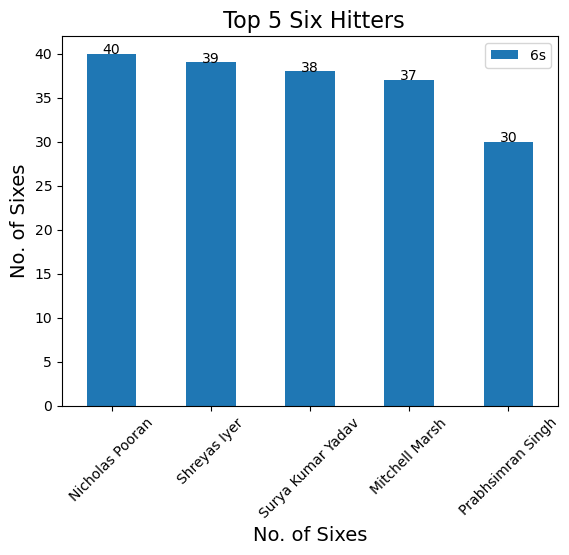

In [135]:
top5_sixes = df.nlargest(5, "6s")
top5_sixes.plot(kind= "bar" , x="Player Name" , y="6s")
plt.ylabel("No. of Sixes",  fontsize= 14)
plt.title(" Top 5 Six Hitters", fontsize= 16)
plt.xlabel("No. of Sixes",  fontsize= 14)
plt.xticks(rotation=45)
for i, v in enumerate(top5_sixes["6s"]):
    plt.text(i, v + 0, str(v), ha='center')

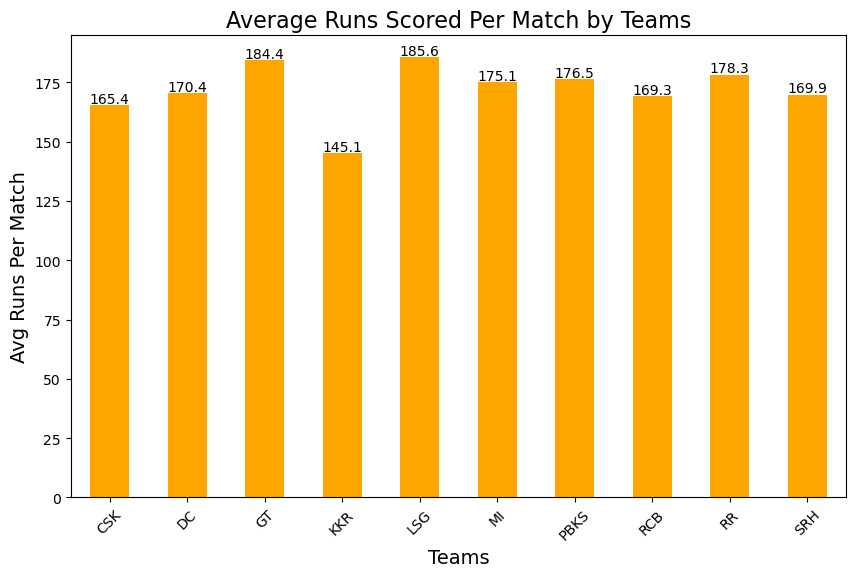

In [136]:
team_runs = df.groupby("Team")["Runs"].sum()
team_matches = df.groupby("Team")["Matches"].max()

avg_team_runs = team_runs / team_matches

plt.figure(figsize=(10,6))
bars = avg_team_runs.plot(kind='bar', color="orange")
plt.title("Average Runs Scored Per Match by Teams", fontsize=16)
plt.xlabel("Teams", fontsize=14)
plt.ylabel("Avg Runs Per Match", fontsize=14)
plt.xticks(rotation=45)


for i, value in enumerate(avg_team_runs):
    plt.text(i, value + 1, f'{value:.1f}', ha='center', fontsize=10)

plt.show()

<Figure size 1000x500 with 0 Axes>

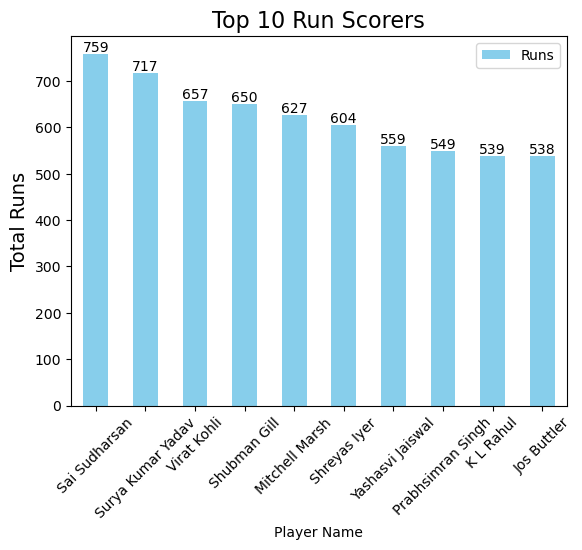

In [134]:
top_10_runs = df.sort_values("Runs", ascending=False).head(10)

plt.figure(figsize=(10,5))
bars = top_10_runs.plot(kind="bar", x="Player Name", y="Runs", color="skyblue")
plt.xticks(rotation=45)
plt.title("Top 10 Run Scorers", fontsize=16)
plt.ylabel("Total Runs", fontsize=14)

for i, v in enumerate(top_10_runs["Runs"]):
    plt.text(i, v + 5,        # position above bar
             str(v),              # value text
             ha='center', fontsize=10)

plt.show()


In [ ]:
team_economy = df.groupby("Team")["ECO"].mean()

plt.figure(figsize=(10,5))
team_economy.plot(kind="bar", color="purple")
plt.title("Team-Wise Bowling Economy")
plt.ylabel("Average Economy Rate")


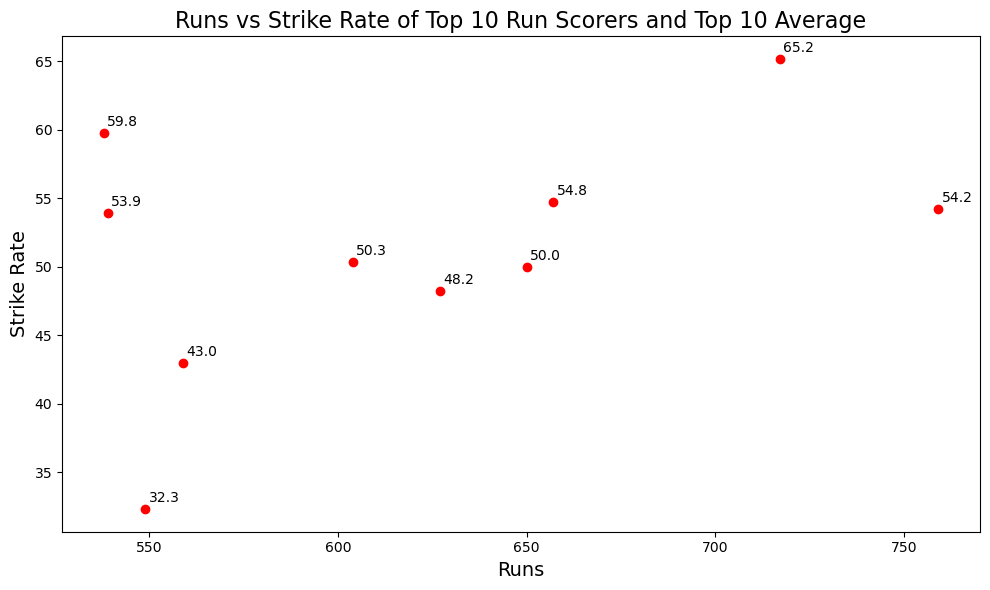

In [122]:
top10_runs_scorers = df["Runs"].head(10)
top10_avg = df["AVG"].head(10)

plt.figure(figsize=(10,6))


plt.scatter(top10_runs_scorers, top10_avg, color="red")


for i in range(len(top10_runs_scorers)):
    plt.text(top10_runs_scorers.iloc[i] + 5,    
             top10_avg.iloc[i] + 0.5,              
             str(round(top10_avg.iloc[i],1)), 
             ha="center", fontsize=10)

plt.title("Runs vs Strike Rate of Top 10 Run Scorers and Top 10 Average", fontsize=16)
plt.xlabel("Runs", fontsize=14)
plt.ylabel("Strike Rate", fontsize=14)
plt.tight_layout()
plt.show()


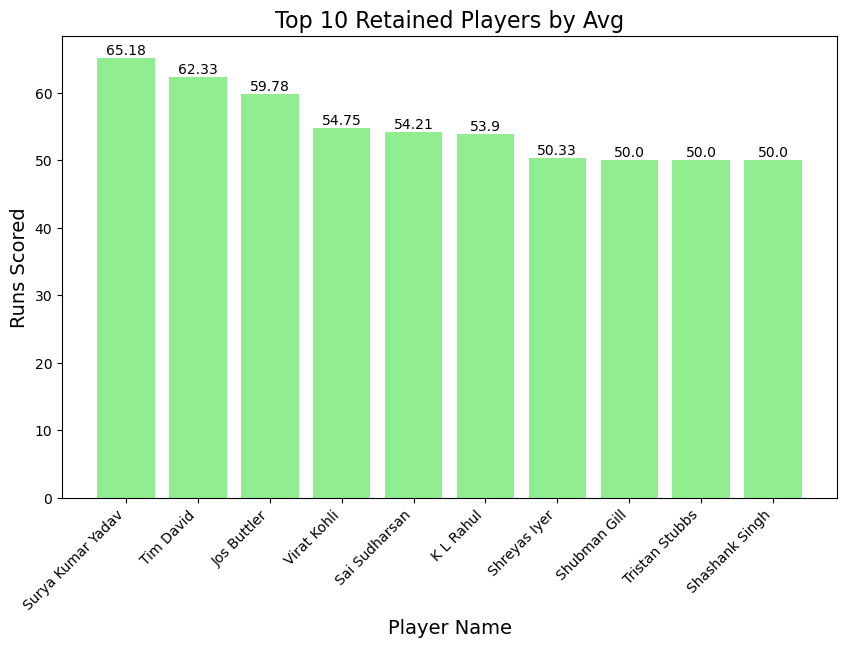

In [140]:
retained_df = df[df["Retain or Not"] == "Retain"]
top_10_retained = retained_df.sort_values("AVG", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_10_retained["Player Name"], top_10_retained["AVG"], color="lightgreen")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Retained Players by Avg", fontsize=16)
plt.xlabel("Player Name", fontsize=14)
plt.ylabel("Runs Scored", fontsize=14)


for i, v in enumerate(top_10_retained["AVG"]):
    plt.text(i, v + 0.5,     
             str(round(v,2)),          
             ha='center', fontsize=10)

plt.show()
